#1.라이브러리 & 데이터로딩
##  학습 목표: PyTorch와 torchvision 사용법, 데이터셋 로딩 방식 이해

**point**:

1. torch, torchvision, transforms의 역할
2. ImageFolder로 로딩된 데이터 구조
3. DataLoader로 배치 구성하는 방법

* 실습 따라하기
* 데이터셋 디렉토리 구조 확인
* transform (Resize, Normalize 등)의 효과 시각화

> 전처리(Preprocessing)

: 모델 학습 전에 데이터를



1.   일정한 형태로 정규화(normalize)
2.   같은 크기로 리사이즈(resize)
3.   데이터 다양성을 위해 증강(augmentation)

<br><br>
* 전처리가 필요한 이유

| 이유                          | 설명                                               |
| --------------------------- | ------------------------------------------------ |
|  **모델이 일관된 입력을 받아야 해서**   | 예: 어떤 이미지는 300x300, 어떤 이미지는 640x480이면 모델이 혼란스러움  |
|  **픽셀 값 정규화로 학습 안정화**     | 대부분의 이미지 픽셀은 0\~255 → 모델은 보통 -1 \~ 1 범위에서 더 잘 작동 |
|  **데이터 증강으로 일반화 향상**      | 이미지 뒤집기, 회전, 자르기 등으로 적은 데이터로도 다양한 경우를 학습         |
|  **노이즈 제거 또는 불필요한 요소 제거** | 예: 문서 이미지에서 배경 제거 등                              |




##torch/ torchvision/ transforms의 역할

| 항목            | 설명            | 대표 기능                         |
| ------------- | ------------- | ----------------------------- |
| `torch`       | 신경망 전체 기능의 중심 | Tensor, nn, optim, autograd   |
| `torchvision` | 이미지 관련 기능 확장  | 모델, 데이터셋, transforms 포함       |
| `transforms`  | 전처리 도구 모음     | Resize, Normalize, ToTensor 등 |


##ImageFolder로 로딩된 데이터 구조

dataset/

├── Cloudy/

│   ├── img1.jpg

│   ├── img2.jpg

│   └── ...

├── Rainy/

│   ├── img1.jpg

│   └── ...

├── Sunny/

│   └── ...


In [ ]:
from torchvision import datasets, transforms

# 전처리 정의
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# 데이터셋 로드
train_dataset = datasets.ImageFolder(root='./train', transform=transform)

# 클래스 확인
print("클래스 리스트:", dataset.classes)         # ['Cloudy', 'Rainy', 'Sunny']
print("클래스 인덱스 매핑:", dataset.class_to_idx) # {'Cloudy': 0, 'Rainy': 1, 'Sunny': 2}

# 첫 번째 샘플 보기
image, label = dataset[0]
print("이미지 크기:", image.shape)  # torch.Size([3, 256, 256])
print("라벨 값:", label)             # 예: 0


클래스 리스트: ['Cloudy', 'Rain', 'Shine', 'Sunrise']
클래스 인덱스 매핑: {'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3}
이미지 크기: torch.Size([3, 256, 256])
라벨 값: 0


##DataLoader로 배치 구성하는 방법

> ImageFolder로 불러온 데이터셋을 학습에 바로 쓰기 위해서는 DataLoader를 사용

> 모델은 데이터를 한꺼번에 다 처리하지 않고 "배치 단위" 로 처리하기 때문

**DataLoader란?**

데이터셋을 작은 묶음(배치) 단위로 자동 분할, 셔플, 병렬 로딩해주는 툴.

In [ ]:
from torch.utils.data import DataLoader
# 기본구조
train_loader = DataLoader(
    dataset=train_dataset,   # 학습용 데이터셋
    batch_size=32,           # 한 번에 처리할 데이터 수 (배치 크기)
    shuffle=True,            # 데이터를 epoch마다 섞을지 여부
    num_workers=2            # 데이터를 로딩할 CPU 쓰레드 수
)

In [ ]:
#출력형태
for images, labels in train_loader:
    print(images.shape)   # torch.Size([32, 3, 256, 256])
    print(labels.shape)   # torch.Size([32])
    break

torch.Size([32, 3, 256, 256])
torch.Size([32])


In [ ]:
# 실전 예시
from torch.utils.data import DataLoader,random_split

# ImageFolder로 불러온 전체 데이터셋
dataset = datasets.ImageFolder(root="./train", transform=transform)

# 학습 / 검증 분할
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# DataLoader 구성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


## transform (Resize, Normalize 등)의 효과 시각화

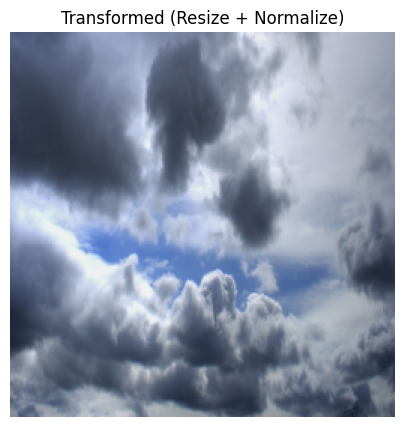

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# 1. 전처리 정의
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# 2. 데이터 정의
dataset = datasets.ImageFolder(root='./train', transform=transform)
loader = DataLoader(dataset, batch_size=5, shuffle=False)

# 3. 첫 번째 배치 하나만 가져오기
images, labels = next(iter(loader))  # images: [1, 3, 256, 256]

# 4. 배치에서 한 장만 꺼내기 → 정규화 해제
image_tensor = images[4]  # (3, 256, 256)
unnormalized = image_tensor * 0.5 + 0.5
np_image = unnormalized.permute(1, 2, 0).numpy()  # (256, 256, 3)

# 5. 시각화
plt.figure(figsize=(5, 5))
plt.imshow(np_image)
plt.title("Transformed (Resize + Normalize)")
plt.axis("off")
plt.show()


# 2.신경망 구성 (MLP 기반)
## 학습 목표: nn.Linear, nn.Sequential 구조 이해

**point**:  

1. nn.Linear, nn.Sequential 구조 이해
2. forward() 함수 작성법
3. 입력 이미지의 shape을 어떻게 Flatten하는지 (255*255*3 등)

* 실습 따라하기
* MLP로 간단한 2-class 분류 실험
* 학습 결과 및 손실 변화 확인

**nn.Linear란?**
>완전 연결(fully connected, dense) 레이어

```
nn.Linear(in_features, out_features)

```
| 항목             | 설명                          |
| -------------- | --------------------------- |
| `in_features`  | 입력 노드 수                     |
| `out_features` | 출력 노드 수                     |
| 내부 구성          | 가중치(weight)와 편향(bias) 자동 생성 |


In [ ]:
import torch.nn as nn
import torch

fc = nn.Linear(784, 128)  # 28x28 이미지 (Flatten) → 128 노드
x = torch.randn(1, 784)
y = fc(x)  # (1, 128)

**nn.Sequential이란?**
>여러 레이어를 순차적으로 쌓는 컨테이너 역할

```
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

```
* 입력 → Linear → ReLU → Linear → 출력 순으로 자동 연결

* 딥러닝에서 모델 구조를 깔끔하게 구성할 수 있음


In [ ]:
# 동작흐름
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

input = torch.randn(1, 784)
output = model(input)  # 내부에서 순차적으로 처리됨

In [ ]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),                  # 입력 이미지 펼치기
            nn.Linear(3*256*256, 128),     # 입력 크기에 맞게 설정
            nn.ReLU(),                     # 활성화 함수
            nn.Linear(128, 3)              # 클래스 수 만큼 출력
        )

    def forward(self, x):
        return self.model(x)


## 신경망의 입력부터 출력 흐름

>[입력 이미지] → [Flatten] → [Linear Layer] → [출력 (클래스 확률 등)]


* 대부분의 이미지 입력은 (채널, 높이, 너비) 형태의 3차원 텐서이다.

**[Flatten]** : 3차원 이미지를 1차원 벡터로 펼침
> 신경망의 Linear 레이어는 1D 벡터만 입력받을 수 있기 때문에 필수 단계이다.

```
Flatten()  
→ (3, 256, 256) → 3×256×256 = 196,608  
→ torch.Size([196608])  ← 이렇게 1차원으로 바꿈
```

**[Linear]** : 완전 연결 레이어
>벡터를 다음 출력 크기로 매핑하는 계산 단계 (Wx + b)

```
nn.Linear(196608, 128)
```

* 입력 차원: 196608 (Flatten된 이미지)

* 출력 차원: 128 (특징 벡터)

* 내부에서 weight와 bias를 학습함

**[출력]** : 분류 결과 (예: 클래스 수 만큼의 score)
> 마지막 Linear 레이어에서 클래스 수만큼 출력 노드를 설정함.

```
nn.Linear(128, 3)  # 클래스 3개
```
* 출력은 [score_0, score_1, score_2]

* 보통 softmax를 적용해 확률로 해석

## 단일 vs 다단 Linear 구조

① 단일 Linear

```
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(3*256*256, 128),  # 입력 → 바로 출력
    nn.ReLU()
)
```

② 여러 Linear
```
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(3*256*256, 512),  # 입력 → 중간 표현
    nn.ReLU(),
    nn.Linear(512, 128),        # 중간 표현 → 더 압축된 표현
    nn.ReLU(),
    nn.Linear(128, 3)           # 최종 출력 (클래스 수)
)
```

| 항목         | 단일 Linear         | 여러 Linear              |
| ---------- | ----------------- | ---------------------- |
| **깊이**     | shallow (얕은 네트워크) | deep (깊은 네트워크)         |
| **표현력**    | 단순한 관계만 학습 가능     | 더 복잡한 관계 학습 가능         |
| **성능 잠재력** | 작음                | 큼 (복잡한 문제에 적합)         |
| **연산량**    | 작음                | 많음 (속도 느릴 수 있음)        |
| **용도**     | 간단한 문제            | 이미지 분류, 음성 인식 등 복잡한 문제 |

>여러 Linear 사이에 비선형 함수(ReLU 등) 를 넣으면
모델이 단순 선형 조합을 넘어서 곡선적이고 복잡한 패턴을 학습.

## forward() 함수 작성법

**forward() 함수란?**
>입력이 들어왔을 때 실제로 계산되는 경로(연산 순서) 를 정의하는 함수


In [ ]:
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.linear1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.linear1(x)   # 입력 → 첫 번째 레이어
        x = self.relu(x)      # 비선형성 부여
        x = self.linear2(x)   # 출력층
        return x              # 최종 출력값 반환


**forward() 함수 규칙**

* forward() 함수 단계별 구조


| **단계**          | **설명**                                |
|------------------|------------------------------------------|
| `__init__()`     | 모델에 사용할 레이어와 구성 요소 정의         |
| `forward(x)`     | 입력을 받아 레이어 순서대로 계산 수행       |


<br><br>

* forward() 함수의 핵심 규칙

| **항목**          | **내용**                                                                         |
|------------------|----------------------------------------------------------------------------------|
| **오버라이드 필수** | `nn.Module`을 상속하면 반드시 `forward()`를 정의해야 함                               |
| **자동 호출**      | `model(x)`처럼 호출하면 내부적으로 `forward(x)`가 실행됨                             |
| **반환 값**        | 보통 `Tensor`, 또는 `loss`, `logits`, `features` 등 다양한 정보가 포함됨                   |


**sklearn이란?**
>파이썬 기반의 머신러닝 라이브러리

* 지도 학습, 비지도 학습, 모델 평가, 데이터 전처리 등
대부분의 머신러닝 실험을 빠르게 함
* 코드가 간단하고 직관적

**주요기능**

| 분야      | 기능 예시                                                         |
| ------- | ------------------------------------------------------------- |
|  데이터셋 | `make_moons`, `load_iris`, `train_test_split`                 |
|  모델   | `SVC`, `RandomForest`, `LogisticRegression`, `KNN` 등          |
|  전처리  | `StandardScaler`, `MinMaxScaler`, `LabelEncoder`              |
|  평가   | `accuracy_score`, `confusion_matrix`, `classification_report` |
|  교차검증 | `KFold`, `GridSearchCV`, `cross_val_score`                    |


## MLP로 간단한 2-class 분류 실험

In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. 데이터 생성 및 전처리
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
# StandardScaler(): 데이터 값들을 평균 0, 표준편차 1로 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 텐서 변환
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
# 모델의 출력 shape [N, 1]과 맞춤
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# 2. MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
            # nn.Linear(2, 16): 입력이 2차원이니까 첫 레이어 입력 크기는 2
        self.linear1 = nn.Linear(2, 16)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(16, 8)
        self.linear3 = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()# 출력: 확률처럼 [0~1]

    def forward(self, x):
        # return self.model(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.sigmoid(x)
        return x

model = MLP()

# 3. 학습 준비
criterion = nn.BCELoss()  # 이진 분류
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. 학습 루프
for epoch in range(100):
    # y_pred: 모델이 예측한 확률값
    y_pred = model(X_train)
    #  실제 정답(0/1)과 확률 예측 사이의 오차 계산
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    #  오차를 바탕으로 gradient 계산
    loss.backward()
    # 모델의 가중치(weight) 업데이트
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# 5. 평가
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_label = (y_pred_test > 0.5).float()
    acc = (y_pred_label == y_test).float().mean()
    print(f"Test Accuracy: {acc:.4f}")


Epoch 10, Loss: 0.5538
Epoch 20, Loss: 0.3654
Epoch 30, Loss: 0.2919
Epoch 40, Loss: 0.2691
Epoch 50, Loss: 0.2501
Epoch 60, Loss: 0.2321
Epoch 70, Loss: 0.2096
Epoch 80, Loss: 0.1802
Epoch 90, Loss: 0.1454
Epoch 100, Loss: 0.1155
Test Accuracy: 0.9750
